<a href="https://colab.research.google.com/github/evaneliz/534groupprojfiles/blob/main/mapscbcopy_of_copygroup_assignment_5_evanpopparams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
!pip install numpy pandas seaborn

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [182]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [183]:
sns.set_style("whitegrid")
sns.set_context("paper")

np.random.seed(0)

In [184]:
url = 'https://raw.githubusercontent.com/evaneliz/534groupprojfiles/refs/heads/main/RECLEANEDsocial_explorer_census_data%20-%20RECLEANEDsocial_explorer_census_data.csv'
dftransit = pd.read_csv(url)

In [185]:
dftransit.head()

,Statistics,2080.01,2083.01,2083.02,2084.01,2085.02,2087.1,2087.2,2088.01,2088.02,...,2098.2,2100.1,2111.23,2111.24,2122.02,2122.03,2122.04,2134.01,2134.02,TOTAL
0,total_pop,"2,452","1,904","4,881","4,092","4,208","4,757","3,917","3,397","2,792",...,"2,559","3,349","1,748","4,321","3,417","2,733","3,431","4,818","4,697","115,435"
1,pop_density,"11,025.90","53,050.80","28,733.20","46,144.30","41,750.50","72,312.30","61,583.30","37,559.80","34,191.10",...,"37,004.60","21,208.90","26,316.60","28,329.40","42,863.10","66,581.70","41,683.30","63,633.70","31,045.80","40,539.50"
2,area,0.22,0.04,0.17,0.09,0.1,0.07,0.06,0.09,0.08,...,0.07,0.16,0.07,0.15,0.08,0.04,0.08,0.08,0.15,2.85
3,total_workers,"1,828",961,"2,248","2,154","2,011","2,904","2,070","1,507","1,473",...,"1,230","1,516","1,135","2,291","1,947","1,366","1,801","2,586","2,290","57,498"
4,pct_car_truck_van,59.10%,45.10%,62.50%,52.90%,56.90%,62.80%,43.60%,54.90%,59.60%,...,62.30%,45.40%,46.90%,56.70%,52.60%,51.80%,64.10%,70.30%,68.90%,52.20%


In [186]:
dftransit["Statistics"] = dftransit["Statistics"].str.replace(".", "", regex=False)

dftransit["Statistics"].astype(str)

,Statistics
0,total_pop
1,pop_density
2,area
3,total_workers
4,pct_car_truck_van
5,pct_drove_alone
6,pct_carpooled
7,pct_pubtransit
8,pct_motorcycle
9,pct_bike


In [187]:
for column in dftransit.columns:
  if "pct" in column.lower():
    dftransit[column] = dftransit[column].str.replace('%', '', regex=False).astype(float)

In [188]:
dftransit = dftransit.T

In [189]:
dftransit.rename(columns=dftransit.iloc[0], inplace=True)

In [190]:
dftransit.drop(dftransit.index[0], inplace=True)

In [191]:
dftransit = dftransit.reset_index()

In [192]:
dftransit.head()

,index,total_pop,pop_density,area,total_workers,pct_car_truck_van,pct_drove_alone,pct_carpooled,pct_pubtransit,pct_motorcycle,...,pct_other,pct_wfh,pct_nonwfh,pct_less_than_ten,pct_ten_to_nineteen,pct_twenty_to_twentynine,pct_thirty_to_thirtynine,pct_forty_to_fiftynine,pct_sixty_to_eightynine,pct_ninety_or_more
0,2080.01,"2,452","11,025.90",0.22,"1,828",59.10%,41.10%,18.00%,14.60%,0.00%,...,0.00%,11.30%,88.70%,2.60%,30.40%,13.20%,22.80%,14.40%,5.30%,0.00%
1,2083.01,"1,904","53,050.80",0.04,961,45.10%,34.40%,10.60%,39.70%,0.00%,...,1.50%,6.20%,93.80%,5.00%,12.20%,13.60%,26.30%,17.50%,14.80%,4.40%
2,2083.02,"4,881","28,733.20",0.17,"2,248",62.50%,52.60%,10.00%,22.80%,0.00%,...,1.70%,8.50%,91.50%,5.30%,13.60%,12.40%,27.30%,13.50%,11.80%,7.70%
3,2084.01,"4,092","46,144.30",0.09,"2,154",52.90%,39.10%,13.80%,42.50%,0.00%,...,1.10%,2.50%,97.50%,2.40%,17.80%,14.50%,35.90%,7.50%,13.00%,6.40%
4,2085.02,"4,208","41,750.50",0.1,"2,011",56.90%,48.40%,8.50%,27.80%,0.10%,...,1.10%,3.70%,96.30%,4.50%,22.60%,13.30%,23.90%,17.90%,6.20%,7.80%


In [193]:
url = "https://raw.githubusercontent.com/evaneliz/534groupprojfiles/refs/heads/main/indexCensusZonalStatsMP.08072022.csv"
dfheat = pd.read_csv(url)

In [194]:
dfheat.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,index,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,_mean,_median,_stdev,_min,_max,_range
0,6,37,212203,1400000US06037212203,6037212203,2122.03,Census Tract 2122.03,CA,Los Angeles County,California,CT,106312,0,319.431539,319.410004,0.757958,317.760010,320.779999,3.019989
1,6,37,209104,1400000US06037209104,6037209104,2091.04,Census Tract 2091.04,CA,Los Angeles County,California,CT,69958,0,320.068232,320.160004,0.577502,318.899994,321.059998,2.160004
2,6,37,212204,1400000US06037212204,6037212204,2122.04,Census Tract 2122.04,CA,Los Angeles County,California,CT,213185,0,319.787408,319.869995,0.765644,318.000000,320.899994,2.899994
3,6,37,212202,1400000US06037212202,6037212202,2122.02,Census Tract 2122.02,CA,Los Angeles County,California,CT,206471,0,320.469810,320.440002,0.433844,319.559998,321.540009,1.980011
4,6,37,209820,1400000US06037209820,6037209820,2098.20,Census Tract 2098.20,CA,Los Angeles County,California,CT,179107,0,320.675219,320.630005,0.494390,319.559998,321.980011,2.420013


In [195]:
dftransit = dftransit[dftransit['index'] != "TOTAL"]

In [196]:
dftransit['index'] = pd.to_numeric(dftransit['index'])

In [197]:
merged_df = pd.merge(dftransit, dfheat, on='index')
print(merged_df.head())

     index total_pop pop_density  area total_workers pct_car_truck_van  \
0  2080.01     2,452   11,025.90  0.22         1,828            59.10%   
1  2083.01     1,904   53,050.80  0.04           961            45.10%   
2  2083.02     4,881   28,733.20  0.17         2,248            62.50%   
3  2084.01     4,092   46,144.30  0.09         2,154            52.90%   
4  2085.02     4,208   41,750.50   0.1         2,011            56.90%   

  pct_drove_alone pct_carpooled pct_pubtransit pct_motorcycle  ...  \
0          41.10%        18.00%         14.60%          0.00%  ...   
1          34.40%        10.60%         39.70%          0.00%  ...   
2          52.60%        10.00%         22.80%          0.00%  ...   
3          39.10%        13.80%         42.50%          0.00%  ...   
4          48.40%         8.50%         27.80%          0.10%  ...   

   STATE_NAME LSAD   ALAND AWATER       _mean     _median    _stdev  \
0  California   CT  575976      0  318.805957  318.739990  1.11

In [198]:
merged_df['pop_density'] = merged_df['pop_density'].astype(str)

In [199]:
merged_df['pop_density'] = merged_df['pop_density'].str.replace(',', '').str.split(',').str[0]

In [200]:
merged_df['pop_density'] = pd.to_numeric(merged_df['pop_density'])

In [201]:
#creating population parameters
# Calculate the mean of 'pop_density'
population_mean = merged_df['pop_density'].mean()

# Calculate the standard deviation of 'pop_density'
population_std = merged_df['pop_density'].std()

# Calculate the sample size
sample_size = len(merged_df['pop_density'])

# Calculate the standard error of the mean
standard_error = population_std / np.sqrt(sample_size)


print(f"Population Mean: {population_mean}")
print(f"Population Standard Deviation: {population_std}")
print(f"Sample Size: {sample_size}")
print(f"Standard Error: {standard_error}")

# Example: Calculate a 95% confidence interval for the population mean
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * standard_error
confidence_interval = (population_mean - margin_of_error, population_mean + margin_of_error)

print(f"{confidence_level*100:.0f}% Confidence Interval: {confidence_interval}")

Population Mean: 48738.99705882353
Population Standard Deviation: 22839.36426253274
Sample Size: 34
Standard Error: 3916.9186565787445
95% Confidence Interval: (41061.97756155618, 56416.01655609088)


**Interpretation & Analysis of Population Parameters**

In this inferential analysis, we examined population densite in Macarthur Park, our area of focus, to establish a base understanding of the area's demographic concentration. Estimating population parameters provides important and much needed context for our research. Population density is important in analyzing transportation behavior, especially considering higher densities often have a greater reliance on public transit. Understanding the pop_density distribution allows us to better interpret correlations with transit choices under different temperature conditions.

**Inductive Interpretation:**



*   Pop Mean: 48,739 people/square mile: This number suggests that MacArthur Park is a highly dense, urbanized neighborhood. Which is consistent with our research.
*   Std Deviation: The number 22,839 shows that there is significant variability in density between different zones. This is consistent with what we know of the neighborhood area outside of the data since the area consists of commercial hubs, residential zones, and the park itself--all of which would have varying pop densities.
*   Std Error: 3,917, The smaller number indicates that the sample mean is reliable and the expected variation is slim.

Overall, the numerical data confirms that MacArthur Park is a densely populated area with its respective zones varying in density.


In [202]:
import statsmodels.api as sm

In [340]:
gdf_tracts = gpd.read_file(
    "https://raw.githubusercontent.com/evaneliz/534groupprojfiles/refs/heads/main/censustractsMPgeofile.geojson"
)
gdf_tracts.shape
# uploading census tract shape file

(34, 14)

In [341]:
print(merged_df.columns)

Index(['index', 'total_pop', 'pop_density', 'area', 'total_workers',
       'pct_car_truck_van', 'pct_drove_alone', 'pct_carpooled',
       'pct_pubtransit', 'pct_motorcycle', 'pct_bike', 'pcty_walked',
       'pct_other', 'pct_wfh', 'pct_nonwfh', 'pct_less_than_ten',
       'pct_ten_to_nineteen', 'pct_twenty_to_twentynine',
       'pct_thirty_to_thirtynine', 'pct_forty_to_fiftynine',
       'pct_sixty_to_eightynine', 'pct_ninety_or_more', 'STATEFP', 'COUNTYFP',
       'TRACTCE', 'AFFGEOID', 'GEOID', 'NAMELSAD', 'STUSPS', 'NAMELSADCO',
       'STATE_NAME', 'LSAD', 'ALAND', 'AWATER', '_mean', '_median', '_stdev',
       '_min', '_max', '_range'],
      dtype='object')


In [342]:
print(gdf_tracts['NAME'].dtype)
print(merged_df['index'].dtype)
# checking what type the name and index columns are

object
object


In [343]:
merged_df['index'] = merged_df['index'].astype(float).astype(int).astype(str)
gdf_tracts['NAME'] = gdf_tracts['NAME'].astype(float).astype(int).astype(str)
# changing index type to string

In [344]:
merged_df['index'] = merged_df['index'].str.rstrip('.0')

In [345]:
gdf_tracts['NAME'] = gdf_tracts['NAME'].str.strip()

In [346]:
merged_df['index'] = merged_df['index'].replace({'208': '2080', '21': '2100'})

In [347]:
gdf_tracts_data = pd.merge(
    left=gdf_tracts, right=merged_df, left_on="NAME", right_on="index", how="left"
)
gdf_tracts_data.shape
# merging csv file to shape file

(80, 54)

In [348]:
missing_matches = gdf_tracts_data[gdf_tracts_data['total_pop'].isnull()]
print(f"Number of unmatched rows after correction: {len(missing_matches)}")

Number of unmatched rows after correction: 0


In [279]:
gdf_tracts_data.columns
# checking to see that merge was complete

Index(['STATEFP_x', 'COUNTYFP_x', 'TRACTCE_x', 'AFFGEOID_x', 'GEOID_x', 'NAME',
       'NAMELSAD_x', 'STUSPS_x', 'NAMELSADCO_x', 'STATE_NAME_x', 'LSAD_x',
       'ALAND_x', 'AWATER_x', 'geometry', 'index', 'total_pop', 'pop_density',
       'area', 'total_workers', 'pct_car_truck_van', 'pct_drove_alone',
       'pct_carpooled', 'pct_pubtransit', 'pct_motorcycle', 'pct_bike',
       'pcty_walked', 'pct_other', 'pct_wfh', 'pct_nonwfh',
       'pct_less_than_ten', 'pct_ten_to_nineteen', 'pct_twenty_to_twentynine',
       'pct_thirty_to_thirtynine', 'pct_forty_to_fiftynine',
       'pct_sixty_to_eightynine', 'pct_ninety_or_more', 'STATEFP_y',
       'COUNTYFP_y', 'TRACTCE_y', 'AFFGEOID_y', 'GEOID_y', 'NAMELSAD_y',
       'STUSPS_y', 'NAMELSADCO_y', 'STATE_NAME_y', 'LSAD_y', 'ALAND_y',
       'AWATER_y', '_mean', '_median', '_stdev', '_min', '_max', '_range'],
      dtype='object')

**Sean's Linear Regression Below:**

In [211]:
import statsmodels.api as sm
import pandas as pd

In [280]:
response = "pcty_walked" # creating response of pct walked
predictors = ["_median", "_mean", "_min"] # creating predictors of median, mean, min temperature

In [281]:
lrdata = merged_df[[response] + predictors].dropna() # creating lrdata out of merged_df with responses and predictors
print(lrdata.shape)

(34, 4)


In [282]:
lrdata.head() # seeing that pcty_walked is a string

,pcty_walked,_median,_mean,_min
0,15.00%,318.739990,318.805957,316.519989
1,4.60%,320.680008,320.605834,319.119995
2,3.20%,320.299988,320.270188,318.660004
3,0.00%,320.540009,320.431930,318.980011
4,9.90%,320.019989,319.939050,318.739990


In [215]:
lrdata['pcty_walkedfloat'] = lrdata['pcty_walked'].str.replace('%', '') # creating column pcty_walkedfloat which is pcty_walked without percent sign

In [216]:
print(lrdata['pcty_walkedfloat'].dtype) # seeing pcty_walkedfloat is still object

object


In [217]:
lrdata['pcty_walkedfloat'] = lrdata['pcty_walkedfloat'].astype(float) # changing pcty_walkedfloat to float

In [218]:
print(lrdata['pcty_walkedfloat'].dtype) # seeing pcty_walkedfloat is now float

float64


In [219]:
response = 'pcty_walkedfloat' # designating response as pcty_walkedfloat instead of pcty_walked

In [220]:
X = lrdata[predictors] # designating X as predictors
y = lrdata[response] # designating y as new response

In [349]:
model = sm.OLS(y, sm.add_constant(X)) # linear regression
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       pcty_walkedfloat   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     4.758
Date:                Sun, 08 Dec 2024   Prob (F-statistic):            0.00788
Time:                        08:29:16   Log-Likelihood:                -92.045
No. Observations:                  34   AIC:                             192.1
Df Residuals:                      30   BIC:                             198.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        293.7229    233.810      1.256      0.2

**Regression Model Estimation And Interpretation:**
This regression model analyzed the impact of variable "pcty_walked" on dependent variables. The results showed us that other variables had a signifcant negative effect, while "pcty_walked" did not. This high condition number indicated a potential issue with multicollinearity, which could effect the reliability of the coefficents. Further analysis and consideration of some additional variables may enhance our model's explanatory power and practical relevance for decison making. It is very cruical to clearly define/understamd the variables in regression models to accurately interpret the results and draw meaningful conclusions.

We specified our regression model by including variable "pcty_walked" as an independent variable and analyzing the impact on less specific dependent variables. It was specified this way in the regression model simply because of its perceieved relevance to our research question and our hypothesis being investigated.



Evan McAvenia = uploaded and cleaned data, created population parameters

Emily Sanchez = Explained population parameter results.

Sean Bowers = Created the linear regression model.

Chiarra Bettega = Regression Model Estimation and Interpretation.

Joseph Trinidad = Helped set up regression model. Created CSV file with QGIS and zonal statistics to make surface level temperatures in census tracts to merge with the traffic data. Then I merged the CSV file with the census tract shape file to set up for the regression model.

In [367]:
pip install geopandas mapclassify pandas shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.6 MB/s eta 0:00:00


Text(0.5, 1.0, 'Surface Level Temperatures in Macarthur Park - Unit: Kelvin')

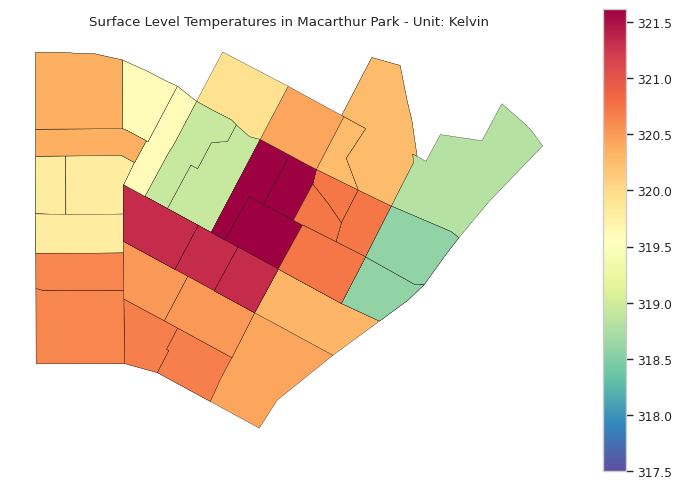

In [407]:
ax = gdf_tracts_data.plot(
    column="_mean", cmap="Spectral_r", edgecolor="k", lw=0.2, figsize=(9, 6), legend=True
)
ax.axis("off")
ax.set_title("Surface Level Temperatures in Macarthur Park - Unit: Kelvin")

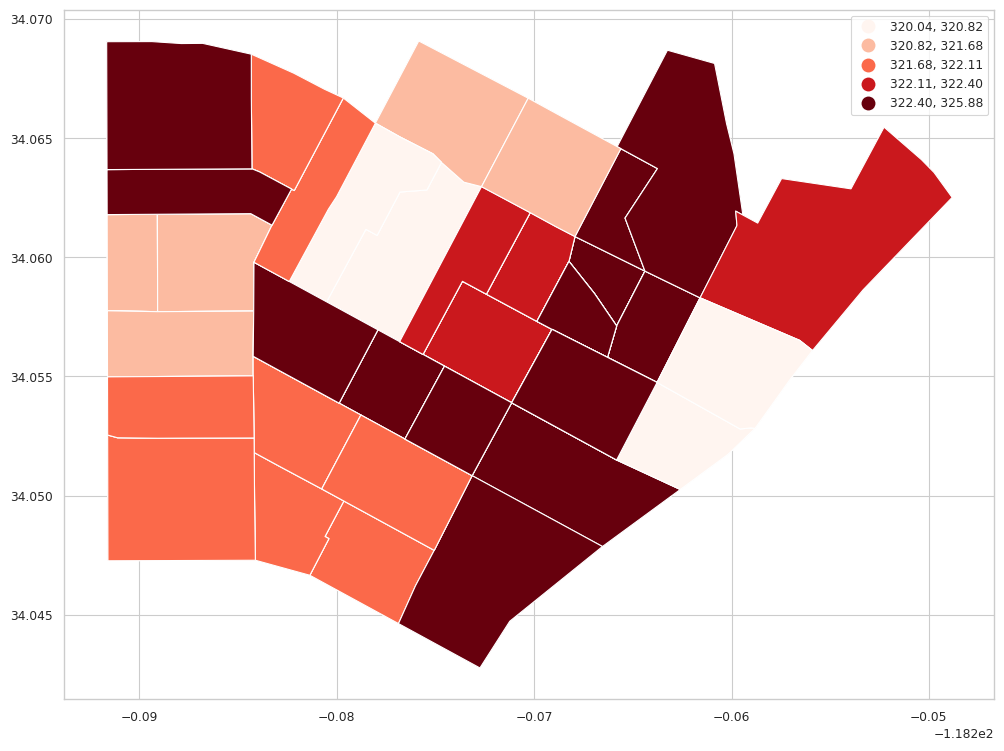

In [373]:
ax = gdf_tracts.plot(facecolor="#aaaaaa", edgecolor="w", lw=0.5, figsize=(12, 9), legend=False)

# now plot listings, colored by asking rent
ax = gdf_tracts_data.plot(
    ax=ax, markersize=10, legend=True, cmap="Reds", column="_max", scheme="Quantiles"
)
